<a href="https://colab.research.google.com/github/Elizabeth-778/Angelman-syndrome/blob/main/Feature_selection_model_mouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gprofiler-official

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from gprofiler import GProfiler
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RepeatedKFold, cross_val_score,StratifiedKFold,RepeatedStratifiedKFold
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import kstest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [ ]:
gp = GProfiler(return_dataframe=True)

In [ ]:
#mouse
GSE16889 = pd.read_csv("GSE16889_mouse_hippocampus_DeSeq2_ExpressionTable_counts_DeSeq2_All.txt", sep="\t", header=0)

In [ ]:
GSE16889['ALIAS'] = GSE16889['ALIAS'].str.upper()

In [ ]:
GSE16889.head()

,ALIAS,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Control1,Control2,Control3,AS1,AS2,AS3,SYMBOL,GENENAME
0,0610009B22RIK,88.525335,-0.060656,0.224513,-0.270168,0.787031,0.894373,94.922519,80.016368,96.640331,77.739293,89.365826,92.467672,0610009B22Rik,RIKEN cDNA 0610009B22 gene
1,0610009E02RIK,108.899455,-0.138444,0.236665,-0.584978,0.558562,0.752778,81.057432,109.113229,152.911916,95.128346,98.940735,116.245073,0610009E02Rik,RIKEN cDNA 0610009E02 gene
2,0610010F05RIK,379.772252,-0.288068,0.133230,-2.162180,0.030604,0.148709,374.357349,436.452917,441.609614,351.872591,307.992934,366.348109,0610010F05Rik,RIKEN cDNA 0610010F05 gene
3,0610010K14RIK,142.287704,0.339203,0.183070,1.852862,0.063902,0.227933,117.319967,119.504965,140.678963,150.364160,161.177650,164.680520,0610010K14Rik,RIKEN cDNA 0610010K14 gene
4,0610012G03RIK,344.489796,0.191078,0.133850,1.427550,0.153421,0.371226,300.765734,342.927292,321.726672,338.575080,362.250757,400.693244,0610012G03Rik,RIKEN cDNA 0610012G03 gene


In [ ]:
GSE16889_list=GSE16889['ALIAS'].tolist()

In [ ]:
gp = GProfiler(return_dataframe=True)
converted_GSE16889 = gp.convert(organism='mmusculus',
            query=GSE16889_list,
            target_namespace='ENSG')

In [ ]:
GSE16889['ALIAS'] = converted_GSE16889['converted']

In [ ]:
GSE16889=GSE16889.rename(columns={'ALIAS': 'ENSEMBL'})
GSE16889=GSE16889.dropna()
GSE16889=GSE16889.reset_index(drop=True)

In [ ]:
GSE16889

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Control1,Control2,Control3,AS1,AS2,AS3,SYMBOL,GENENAME
0,ENSMUSG00000007777,88.525335,-0.060656,0.224513,-0.270168,0.787031,0.894373,94.922519,80.016368,96.640331,77.739293,89.365826,92.467672,0610009B22Rik,RIKEN cDNA 0610009B22 gene
1,ENSMUSG00000086714,108.899455,-0.138444,0.236665,-0.584978,0.558562,0.752778,81.057432,109.113229,152.911916,95.128346,98.940735,116.245073,0610009E02Rik,RIKEN cDNA 0610009E02 gene
2,None,379.772252,-0.288068,0.133230,-2.162180,0.030604,0.148709,374.357349,436.452917,441.609614,351.872591,307.992934,366.348109,0610010F05Rik,RIKEN cDNA 0610010F05 gene
3,ENSMUSG00000020831,142.287704,0.339203,0.183070,1.852862,0.063902,0.227933,117.319967,119.504965,140.678963,150.364160,161.177650,164.680520,0610010K14Rik,RIKEN cDNA 0610010K14 gene
4,None,344.489796,0.191078,0.133850,1.427550,0.153421,0.371226,300.765734,342.927292,321.726672,338.575080,362.250757,400.693244,0610012G03Rik,RIKEN cDNA 0610012G03 gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11377,ENSMUSG00000059839,2112.837306,-0.229229,0.100370,-2.283842,0.022381,0.124870,2100.027409,2400.491041,2338.940669,2184.883297,1811.253785,1841.427633,Zer1,"zyg-11 related, cell cycle regulator"
11378,ENSMUSG00000089857,2112.837306,-0.229229,0.100370,-2.283842,0.022381,0.124870,2100.027409,2400.491041,2338.940669,2184.883297,1811.253785,1841.427633,Zyg11b,"zyg-ll family member B, cell cycle regulator"
11379,ENSMUSG00000072623,342.312137,0.203596,0.132320,1.538664,0.123886,0.329424,348.760266,305.517042,299.707356,385.627810,364.644484,349.615863,Zyx,zyxin
11380,ENSMUSG00000072623,669.720753,-0.008509,0.116095,-0.073292,0.941574,0.971097,672.989993,660.914416,680.152203,760.003881,646.306417,597.957610,Zzef1,"zinc finger, ZZ-type with EF hand domain 1"


In [ ]:
#mouse
GSE130883 = pd.read_csv("GSE130883_ExpressionTable_DeSeq2_All.txt", sep="\t", header=0)

In [ ]:
GSE130883['ENSEMBL'] = GSE130883['ENSEMBL'].str.upper()

In [ ]:
GSE130883.shape

(13951, 21)

In [ ]:
GSE130883.head()

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,WT_M_6GCCAATL007SAll_PE,WT_M_5ACAGTGL007SAll_PE,WT_M_10TAGCTTL007SAll_PE,...,WT_F_7CAGATCL007SAll_PE,WT_F_2CGATGTL007SAll_PE,AS_M_9GATCAGL007SAll_PE,AS_M_3TTAGGCL007SAll_PE,AS_M_12CTTGTAL007SAll_PE,AS_F_4TGACCAL007SAll_PE,AS_F_1ATCACGL007SAll_PE,AS_F_11GGCTACL007SAll_PE,SYMBOL,GENENAME
0,ENSMUSG00000069049,2.083333,1.154783e-01,0.941849,1.226081e-01,0.902417,1,4,4,4,...,0,0,4,4,4,0,1,0,Eif2s3y,"eukaryotic translation initiation factor 2, su..."
1,ENSMUSG00000069045,1.666667,1.045611e-06,0.972557,1.075115e-06,0.999999,1,3,3,3,...,0,1,3,3,3,0,1,0,Ddx3y,"DEAD box helicase 3, Y-linked"
2,ENSMUSG00000068457,1.250000,1.926449e-01,0.927850,2.076252e-01,0.835522,1,2,2,2,...,0,1,2,2,2,0,1,1,Uty,ubiquitously transcribed tetratricopeptide rep...
3,ENSMUSG00000056673,1.166667,3.210710e-07,0.981038,3.272768e-07,1.000000,1,2,2,2,...,1,0,2,2,2,0,0,1,Kdm5d,lysine (K)-specific demethylase 5D
4,ENSMUSG00000025332,3.000000,7.093795e-07,0.546241,1.298658e-06,0.999999,1,3,3,3,...,3,3,3,3,3,3,3,3,Kdm5c,lysine (K)-specific demethylase 5C


In [ ]:
ensembl_130883_list = GSE130883['ENSEMBL'].tolist()

In [ ]:
#mouse
GSE137217_p2 = pd.read_csv("GSE137217_Cortex_counts_p2_maternalParentalOrigin_new_DeSeq2_All.txt", sep="\t", header=0)

In [ ]:
GSE137217_p2['ACCNUM'] = GSE137217_p2['ACCNUM'].str.upper()

In [ ]:
GSE137217_p2.shape

(8766, 15)

In [ ]:
GSE137217_p2.head()

,ACCNUM,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL602,JL601,JL600,JL605,JL604,JL603,SYMBOL,GENENAME
0,NM_025696,22.777929,-0.004948,0.414629,-0.011933,0.990479,0.999928,24.326661,25.682747,18.289775,27.430061,22.180483,18.757846,Sorcs3,sortilin-related VPS10 domain containing recep...
1,NM_001004468,8.064810,-0.440830,0.695017,-0.634272,0.525903,0.999928,9.009874,5.707277,13.209282,5.486012,8.065630,6.910786,Tacc2,"transforming, acidic coiled-coil containing pr..."
2,NM_153399,94.465695,-0.340287,0.251428,-1.353417,0.175922,0.999928,137.851079,97.974923,80.271790,98.748220,90.738340,61.209815,Syne1,"spectrin repeat containing, nuclear envelope 1"
3,NM_183087,520.935367,0.230023,0.137713,1.670307,0.094859,0.999928,401.840401,570.727706,466.389262,536.531998,521.241354,628.881482,Fam189a1,"family with sequence similarity 189, member A1"
4,NM_016721,221.890075,0.055961,0.189476,0.295346,0.767730,0.999928,207.227113,277.754150,167.656271,204.079656,273.223224,201.400035,Iqgap1,IQ motif containing GTPase activating protein 1


In [ ]:
accnum137217_p2_list=GSE137217_p2['ACCNUM'].tolist()

In [ ]:
gp = GProfiler(return_dataframe=True)
converted_mouse_137217_p2 = gp.convert(organism='mmusculus',
            query=accnum137217_p2_list,
            target_namespace='ENSG')

In [ ]:
GSE137217_p2['ACCNUM'] = converted_mouse_137217_p2['converted']

In [ ]:
GSE137217_p2=GSE137217_p2.rename(columns={'ACCNUM': 'ENSEMBL'})

In [ ]:
GSE137217_p2.head()

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL602,JL601,JL600,JL605,JL604,JL603,SYMBOL,GENENAME
0,ENSMUSG00000063434,22.777929,-0.004948,0.414629,-0.011933,0.990479,0.999928,24.326661,25.682747,18.289775,27.430061,22.180483,18.757846,Sorcs3,sortilin-related VPS10 domain containing recep...
1,ENSMUSG00000030852,8.064810,-0.440830,0.695017,-0.634272,0.525903,0.999928,9.009874,5.707277,13.209282,5.486012,8.065630,6.910786,Tacc2,"transforming, acidic coiled-coil containing pr..."
2,ENSMUSG00000096054,94.465695,-0.340287,0.251428,-1.353417,0.175922,0.999928,137.851079,97.974923,80.271790,98.748220,90.738340,61.209815,Syne1,"spectrin repeat containing, nuclear envelope 1"
3,ENSMUSG00000030518,520.935367,0.230023,0.137713,1.670307,0.094859,0.999928,401.840401,570.727706,466.389262,536.531998,521.241354,628.881482,Fam189a1,"family with sequence similarity 189, member A1"
4,ENSMUSG00000030536,221.890075,0.055961,0.189476,0.295346,0.767730,0.999928,207.227113,277.754150,167.656271,204.079656,273.223224,201.400035,Iqgap1,IQ motif containing GTPase activating protein 1


In [ ]:
#mouse
GSE137217_p9 = pd.read_csv("GSE137217_Cortex_counts_p9_maternalParentalOrigin_new_DeSeq2_All.txt", sep="\t", header=0)

In [ ]:
GSE137217_p9['ACCNUM'] = GSE137217_p9['ACCNUM'].str.upper()

In [ ]:
GSE137217_p9.shape

(28955, 15)

In [ ]:
accnum137217_p9_list=GSE137217_p9['ACCNUM'].tolist()

In [ ]:
gp = GProfiler(return_dataframe=True)
converted_mouse_137217_p9 = gp.convert(organism='mmusculus',
            query=accnum137217_p9_list,
            target_namespace='ENSG')

In [ ]:
GSE137217_p9['ACCNUM'] = converted_mouse_137217_p9['converted']

In [ ]:
GSE137217_p9=GSE137217_p9.rename(columns={'ACCNUM': 'ENSEMBL'})

In [ ]:
GSE137217_p9.head()

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL608,JL607,JL606,JL611,JL610,JL609,SYMBOL,GENENAME
0,None,0.856138,-0.599349,2.092515,-0.286425,0.774553,0.999445,1.012654,1.037550,1.002788,0.000000,1.075780,1.008053,NaN,NaN
1,None,6.594806,0.064781,0.764157,0.084775,0.932440,0.999445,5.063272,6.225303,8.022302,6.611452,8.606243,5.040263,SORCS3,sortilin related VPS10 domain containing recep...
2,None,2.134385,1.095337,1.415221,0.773969,0.438949,0.999445,3.037963,1.037550,0.000000,2.479295,3.227341,3.024158,TACC2,transforming acidic coiled-coil containing pro...
3,ENSMUSG00000063434,26.005715,0.023711,0.391159,0.060616,0.951665,0.999445,28.354323,25.938761,23.064119,26.445808,29.046071,23.185211,NaN,NaN
4,ENSMUSG00000030852,4.152857,0.059912,0.989168,0.060568,0.951703,0.999445,3.037963,2.075101,7.019515,3.305726,6.454682,3.024158,NaN,NaN


In [ ]:
hypothalamus_p2 = pd.read_csv("Hypothalamus_p2_ParentOriginMaternal_ForDeSeq2_Result.txt", sep="\t", header=0)

In [ ]:
hypothalamus_p2['Id'] = hypothalamus_p2['Id'].str.upper()

In [ ]:
hypothalamus_p2.head()

,Id,WT_JL200_P2hyppo,WT_JL201_P2hyppo,WT_JL202_P2hyppo,AS_JL203_P2hyppo,AS_JL204_P2hyppo,AS_JL205_P2hyppo
0,SORCS3,11,6,5,10,10,7
1,SYNE1,21,13,7,16,15,28
2,FAM189A1,159,48,89,84,127,84
3,IQGAP1,31,16,16,17,34,20
4,RBBP6,100,51,29,45,79,60


In [ ]:
hypothalamus_p2_list=hypothalamus_p2['Id'].tolist()

In [ ]:
gp = GProfiler(return_dataframe=True)
converted_hypothalamus_p2 = gp.convert(organism='mmusculus',
            query=hypothalamus_p2_list,
            target_namespace='ENSG')

In [ ]:
hypothalamus_p2['Id'] = converted_hypothalamus_p2['converted']

In [ ]:
hypothalamus_p2=hypothalamus_p2.rename(columns={'Id': 'ENSEMBL'})

In [ ]:
hypothalamus_p2 = hypothalamus_p2.reset_index(drop=True)

In [ ]:
hypothalamus_p2.head()

,ENSEMBL,WT_JL200_P2hyppo,WT_JL201_P2hyppo,WT_JL202_P2hyppo,AS_JL203_P2hyppo,AS_JL204_P2hyppo,AS_JL205_P2hyppo
0,ENSMUSG00000063434,11,6,5,10,10,7
1,ENSMUSG00000096054,21,13,7,16,15,28
2,None,159,48,89,84,127,84
3,ENSMUSG00000030536,31,16,16,17,34,20
4,ENSMUSG00000030779,100,51,29,45,79,60


In [ ]:
#mouse
hypothalamus_p9 = pd.read_csv("GSE137217_hypothalamus_p9_maternal_DeSeq2_All.txt", sep="\t", header=0)

In [ ]:
hypothalamus_p9['ACCNUM'] = hypothalamus_p9['ACCNUM'].str.upper()

In [ ]:
hypothalamus_p9_list=hypothalamus_p9['ACCNUM'].tolist()

In [ ]:
gp = GProfiler(return_dataframe=True)
converted_hypothalamus_p9 = gp.convert(organism='mmusculus',
            query=hypothalamus_p9_list,
            target_namespace='ENSG')

In [ ]:
hypothalamus_p9['ACCNUM'] = converted_hypothalamus_p9['converted']

In [ ]:
hypothalamus_p9=hypothalamus_p9.rename(columns={'ACCNUM': 'ENSEMBL'})
hypothalamus_p9 = hypothalamus_p9.reset_index(drop=True)

In [ ]:
hypothalamus_p9.head()

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL206,JL207,JL208,JL209,JL210,JL211,SYMBOL,GENENAME
0,ENSMUSG00000063434,5.615680,0.350707,0.747345,0.469270,0.638876,0.998907,5.896562,5.907382,3.222017,1.426819,8.377137,8.864160,Sorcs3,sortilin-related VPS10 domain containing recep...
1,ENSMUSG00000096054,35.157757,0.023198,0.351323,0.066031,0.947353,0.998907,23.050198,41.351674,40.812221,45.658216,30.157694,29.916541,Syne1,"spectrin repeat containing, nuclear envelope 1"
2,ENSMUSG00000096054,2.366299,1.051112,1.144886,0.918093,0.358570,0.998907,0.536051,1.181476,3.222017,2.853639,4.188569,2.216040,Syne1,"spectrin repeat containing, nuclear envelope 1"
3,ENSMUSG00000030518,105.472586,0.277701,0.239683,1.158619,0.246612,0.998907,73.975055,101.606971,111.696606,126.986915,105.551927,113.018044,Fam189a1,"family with sequence similarity 189, member A1"
4,ENSMUSG00000030536,12.239501,0.281259,0.518498,0.542449,0.587509,0.998907,7.504716,15.359193,10.740058,14.268193,10.052565,15.512280,Iqgap1,IQ motif containing GTPase activating protein 1


In [ ]:
GSE137217_p2_genes = set(GSE137217_p2['ENSEMBL'])
GSE137217_p9_genes = set(GSE137217_p9['ENSEMBL'])
hypothalamus_p2_genes = set(hypothalamus_p2['ENSEMBL'])
hypothalamus_p9_genes = set(hypothalamus_p9['ENSEMBL'])
GSE16889_genes = set(GSE16889['ENSEMBL'])
GSE130883_genes = set(GSE130883['ENSEMBL'])

In [ ]:
mouse_genes_intersection = GSE137217_p2_genes.intersection(GSE137217_p9_genes,
                                                                     hypothalamus_p2_genes,
                                                                     hypothalamus_p9_genes,
                                                                     GSE16889_genes,
                                                                     GSE130883_genes)
#mouse_genes_intersection_p2_and_pd.remove('None')
len(mouse_genes_intersection)

3236

In [ ]:
mouse_genes_intersection

{'ENSMUSG00000027185',
 'ENSMUSG00000085837',
 'ENSMUSG00000048039',
 'ENSMUSG00000042148',
 'ENSMUSG00000033910',
 'ENSMUSG00000026425',
 'ENSMUSG00000015243',
 'ENSMUSG00000037029',
 'ENSMUSG00000002781',
 'ENSMUSG00000015829',
 'ENSMUSG00000051671',
 'ENSMUSG00000038055',
 'ENSMUSG00000069729',
 'ENSMUSG00000038437',
 'ENSMUSG00000031652',
 'ENSMUSG00000042564',
 'ENSMUSG00000039830',
 'ENSMUSG00000048410',
 'ENSMUSG00000025872',
 'ENSMUSG00000032293',
 'ENSMUSG00000039058',
 'ENSMUSG00000019188',
 'ENSMUSG00000009905',
 'ENSMUSG00000025037',
 'ENSMUSG00000042506',
 'ENSMUSG00000020720',
 'ENSMUSG00000000202',
 'ENSMUSG00000061273',
 'ENSMUSG00000015568',
 'ENSMUSG00000021910',
 'ENSMUSG00000040010',
 'ENSMUSG00000016833',
 'ENSMUSG00000021699',
 'ENSMUSG00000035776',
 'ENSMUSG00000071847',
 'ENSMUSG00000026986',
 'ENSMUSG00000040133',
 'ENSMUSG00000028261',
 'ENSMUSG00000021470',
 'ENSMUSG00000026277',
 'ENSMUSG00000022174',
 'ENSMUSG00000019868',
 'ENSMUSG00000028164',
 'ENSMUSG00

In [ ]:
GSE137217_p2_no_duplicates = GSE137217_p2.drop_duplicates(subset=['ENSEMBL'])

In [ ]:
filtered_GSE137217_p2 = GSE137217_p2_no_duplicates[GSE137217_p2_no_duplicates['ENSEMBL'].isin(mouse_genes_intersection)]

In [ ]:
filtered_GSE137217_p2

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL602,JL601,JL600,JL605,JL604,JL603,SYMBOL,GENENAME
0,ENSMUSG00000063434,22.777929,-0.004948,0.414629,-0.011933,0.990479,0.999928,24.326661,25.682747,18.289775,27.430061,22.180483,18.757846,Sorcs3,sortilin-related VPS10 domain containing recep...
2,ENSMUSG00000096054,94.465695,-0.340287,0.251428,-1.353417,0.175922,0.999928,137.851079,97.974923,80.271790,98.748220,90.738340,61.209815,Syne1,"spectrin repeat containing, nuclear envelope 1"
4,ENSMUSG00000030536,221.890075,0.055961,0.189476,0.295346,0.767730,0.999928,207.227113,277.754150,167.656271,204.079656,273.223224,201.400035,Iqgap1,IQ motif containing GTPase activating protein 1
5,ENSMUSG00000030779,168.682790,-0.074392,0.164038,-0.453505,0.650185,0.999928,166.682678,177.876802,174.768961,152.511140,173.411050,166.846107,Rbbp6,"retinoblastoma binding protein 6, ubiquitin li..."
8,ENSMUSG00000090112,36.199635,-0.347708,0.329652,-1.054773,0.291529,0.999928,35.138510,40.902152,45.724437,29.624466,31.254317,34.553928,Shprh,SNF2 histone linker PHD RING helicase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,ENSMUSG00000009292,23.089643,0.083718,0.410706,0.203839,0.838479,0.999928,17.118761,23.780321,26.418564,26.332859,22.180483,22.706867,Trpm2,"transient receptor potential cation channel, s..."
8680,ENSMUSG00000009293,669.489263,0.062205,0.111141,0.559693,0.575689,0.999928,635.196150,664.897777,664.528491,771.333322,642.225807,638.754032,Ube2g2,ubiquitin-conjugating enzyme E2G 2
8681,ENSMUSG00000009291,1481.926139,0.120303,0.095646,1.257789,0.208468,0.999928,1301.025873,1566.647552,1393.071195,1537.180631,1594.978379,1498.653201,Pttg1ip,pituitary tumor-transforming 1 interacting pro...
8682,ENSMUSG00000032977,242.414648,0.058567,0.141607,0.413590,0.679174,0.999928,233.355749,228.291082,250.976357,250.162158,239.952499,251.750044,Fam207a,"family with sequence similarity 207, member A"


In [ ]:
filtered_GSE137217_p2 = filtered_GSE137217_p2.drop(columns=['baseMean',
                                                                              'log2FoldChange',
                                                                              'lfcSE',
                                                                              'stat',
                                                                              'pvalue',
                                                                              'padj',
                                                                              'SYMBOL',
                                                                              'GENENAME'

                                                                              ])

In [ ]:
filtered_GSE137217_p2 = filtered_GSE137217_p2.set_index('ENSEMBL').T.reset_index()
filtered_GSE137217_p2['Disease status'] = [0,0,0,1,1,1]
filtered_GSE137217_p2 = filtered_GSE137217_p2.drop(columns=['index'])

In [ ]:
filtered_GSE137217_p2['Disease status'] = [0,0,0,1,1,1]

In [ ]:
filtered_GSE137217_p2

ENSEMBL,ENSMUSG00000063434,ENSMUSG00000096054,ENSMUSG00000030536,ENSMUSG00000030779,ENSMUSG00000090112,ENSMUSG00000038587,ENSMUSG00000040653,ENSMUSG00000046201,ENSMUSG00000023826,ENSMUSG00000023830,...,ENSMUSG00000000374,ENSMUSG00000053329,ENSMUSG00000000732,ENSMUSG00000020284,ENSMUSG00000009292,ENSMUSG00000009293,ENSMUSG00000009291,ENSMUSG00000032977,ENSMUSG00000020260,Disease status
0,24.326661,137.851079,207.227113,166.682678,35.138510,355.890041,130.643180,31.534561,20.722711,23.425674,...,221.642912,291.018945,143.257004,258.583397,17.118761,635.196150,1301.025873,233.355749,195.514276,0
1,25.682747,97.974923,277.754150,177.876802,40.902152,406.167884,154.096481,29.487598,36.146088,27.585172,...,251.120190,298.680833,275.851724,272.046873,23.780321,664.897777,1566.647552,228.291082,208.315613,0
2,18.289775,80.271790,167.656271,174.768961,45.724437,317.022767,167.656271,32.515156,27.434662,19.305874,...,218.461201,344.457429,178.833355,304.829583,26.418564,664.528491,1393.071195,250.976357,218.461201,0
3,27.430061,98.748220,204.079656,152.511140,29.624466,371.951630,131.664294,27.430061,27.430061,18.652442,...,240.287336,315.994305,187.621619,335.743949,26.332859,771.333322,1537.180631,250.162158,223.829300,1
4,22.180483,90.738340,273.223224,173.411050,31.254317,505.110093,143.164937,30.246113,30.246113,21.172279,...,236.927888,318.592394,204.665367,281.288854,22.180483,642.225807,1594.978379,239.952499,240.960703,1
5,18.757846,61.209815,201.400035,166.846107,34.553928,433.404977,107.610803,22.706867,39.490203,25.668632,...,220.157881,305.061818,237.928473,244.839258,22.706867,638.754032,1498.653201,251.750044,208.310820,1


In [ ]:
GSE137217_p9_no_duplicates=GSE137217_p9.drop_duplicates(subset=['ENSEMBL'])

In [ ]:
filtered_GSE137217_p9 = GSE137217_p9_no_duplicates[GSE137217_p9_no_duplicates['ENSEMBL'].isin(mouse_genes_intersection)]

In [ ]:
filtered_GSE137217_p9

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL608,JL607,JL606,JL611,JL610,JL609,SYMBOL,GENENAME
3,ENSMUSG00000063434,26.005715,0.023711,0.391159,0.060616,0.951665,0.999445,28.354323,25.938761,23.064119,26.445808,29.046071,23.185211,NaN,NaN
5,ENSMUSG00000096054,691.729652,-0.383994,0.141586,-2.712092,0.006686,0.999445,729.111150,892.293376,729.026725,663.624503,644.392456,491.929700,NaN,NaN
10,ENSMUSG00000030779,0.334263,-1.917384,3.889538,-0.492959,0.622041,0.999445,0.000000,0.000000,2.005576,0.000000,0.000000,0.000000,NaN,NaN
11,ENSMUSG00000030536,166.264471,0.126030,0.184566,0.682844,0.494705,0.999445,163.037354,143.181960,171.476712,199.996425,149.533475,170.360900,NaN,NaN
22,ENSMUSG00000090112,0.340056,-1.938493,3.492331,-0.555071,0.578846,0.999445,0.000000,1.037550,1.002788,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28696,ENSMUSG00000009292,38.655114,0.180874,0.371927,0.486315,0.626744,0.999445,48.607410,33.201614,27.075270,43.800870,25.818729,53.426791,NaN,NaN
28699,ENSMUSG00000009293,585.707795,0.068823,0.117298,0.586737,0.557381,0.999445,619.744478,538.488677,556.547224,575.196331,600.285460,623.984599,NaN,NaN
28703,ENSMUSG00000009291,1721.161100,0.203619,0.097362,2.091364,0.036495,0.999445,1699.234041,1463.983666,1636.549676,1868.561645,1815.917305,1842.720269,NaN,NaN
28704,ENSMUSG00000032977,251.953845,0.001973,0.146584,0.013460,0.989261,0.999445,260.252174,234.486399,260.724826,257.020200,244.202149,255.037324,NaN,NaN


In [ ]:
filtered_GSE137217_p9 = filtered_GSE137217_p9.drop(columns=['baseMean',
                                                                              'log2FoldChange',
                                                                              'lfcSE',
                                                                              'stat',
                                                                              'pvalue',
                                                                              'padj',
                                                                              'SYMBOL',
                                                                              'GENENAME'

                                                                              ])

In [ ]:
filtered_GSE137217_p9 = filtered_GSE137217_p9.set_index('ENSEMBL').T.reset_index()
filtered_GSE137217_p9['Disease status'] = [0,0,0,1,1,1]
filtered_GSE137217_p9 = filtered_GSE137217_p9.drop(columns=['index'])

In [ ]:
filtered_GSE137217_p9

ENSEMBL,ENSMUSG00000063434,ENSMUSG00000096054,ENSMUSG00000030779,ENSMUSG00000030536,ENSMUSG00000090112,ENSMUSG00000038587,ENSMUSG00000040653,ENSMUSG00000046201,ENSMUSG00000023826,ENSMUSG00000023830,...,ENSMUSG00000000374,ENSMUSG00000053329,ENSMUSG00000000732,ENSMUSG00000020284,ENSMUSG00000009292,ENSMUSG00000009293,ENSMUSG00000009291,ENSMUSG00000032977,ENSMUSG00000020260,Disease status
0,28.354323,729.111150,0.000000,163.037354,0.000000,387.846626,140.758958,29.366977,66.835189,29.366977,...,294.682423,404.049096,250.125631,321.011437,48.607410,619.744478,1699.234041,260.252174,219.745999,0
1,25.938761,892.293376,0.000000,143.181960,1.037550,373.518157,139.031759,31.126513,73.666081,17.638357,...,244.861903,371.443056,242.786802,269.763114,33.201614,538.488677,1463.983666,234.486399,200.247234,0
2,23.064119,729.026725,2.005576,171.476712,1.002788,402.117904,135.376352,18.050180,68.189570,16.044605,...,226.630041,368.023120,260.724826,266.741553,27.075270,556.547224,1636.549676,260.724826,218.607739,0
3,26.445808,663.624503,0.000000,199.996425,0.000000,492.553180,146.278377,29.751534,104.956802,14.875767,...,262.805220,386.769947,271.069535,313.217542,43.800870,575.196331,1868.561645,257.020200,224.789371,1
4,29.046071,644.392456,0.000000,149.533475,0.000000,444.297303,166.745961,33.349192,100.047577,7.530463,...,253.884173,388.356722,295.839608,313.052095,25.818729,600.285460,1815.917305,244.202149,235.595906,1
5,23.185211,491.929700,0.000000,170.360900,0.000000,444.551225,160.280374,29.233527,91.732792,14.112737,...,242.940692,439.510961,277.214482,298.383588,53.426791,623.984599,1842.720269,255.037324,237.900429,1


In [ ]:
hypothalamus_p2_no_duplicates=hypothalamus_p2.drop_duplicates(subset=['ENSEMBL'])

In [ ]:
filtered_hypothalamus_p2 = hypothalamus_p2_no_duplicates[hypothalamus_p2_no_duplicates['ENSEMBL'].isin(mouse_genes_intersection)]

In [ ]:
filtered_hypothalamus_p2

,ENSEMBL,WT_JL200_P2hyppo,WT_JL201_P2hyppo,WT_JL202_P2hyppo,AS_JL203_P2hyppo,AS_JL204_P2hyppo,AS_JL205_P2hyppo
0,ENSMUSG00000063434,11,6,5,10,10,7
1,ENSMUSG00000096054,21,13,7,16,15,28
3,ENSMUSG00000030536,31,16,16,17,34,20
4,ENSMUSG00000030779,100,51,29,45,79,60
6,ENSMUSG00000090112,26,11,3,14,12,13
...,...,...,...,...,...,...,...
4669,ENSMUSG00000009292,87,33,41,45,64,63
4670,ENSMUSG00000009293,24,9,5,21,23,15
4671,ENSMUSG00000009291,13,4,7,9,14,4
4672,ENSMUSG00000032977,388,212,54,233,138,339


In [ ]:
filtered_hypothalamus_p2 = filtered_hypothalamus_p2.set_index('ENSEMBL').T.reset_index()
filtered_hypothalamus_p2['Disease status'] = [0,0,0,1,1,1]
filtered_hypothalamus_p2 = filtered_hypothalamus_p2.drop(columns=['index'])

In [ ]:
filtered_hypothalamus_p2

ENSEMBL,ENSMUSG00000063434,ENSMUSG00000096054,ENSMUSG00000030536,ENSMUSG00000030779,ENSMUSG00000090112,ENSMUSG00000038587,ENSMUSG00000040653,ENSMUSG00000046201,ENSMUSG00000023826,ENSMUSG00000023830,...,ENSMUSG00000000374,ENSMUSG00000053329,ENSMUSG00000000732,ENSMUSG00000020284,ENSMUSG00000009292,ENSMUSG00000009293,ENSMUSG00000009291,ENSMUSG00000032977,ENSMUSG00000020260,Disease status
0,11,21,31,100,26,87,59,21,15,17,...,17,589,816,160,87,24,13,388,15,0
1,6,13,16,51,11,65,22,5,4,10,...,7,296,330,78,33,9,4,212,3,0
2,5,7,16,29,3,96,19,7,7,6,...,7,227,332,66,41,5,7,54,4,0
3,10,16,17,45,14,63,33,11,8,11,...,5,269,419,78,45,21,9,233,2,1
4,10,15,34,79,12,141,33,20,14,19,...,16,502,698,142,64,23,14,138,11,1
5,7,28,20,60,13,74,32,11,8,7,...,17,403,531,116,63,15,4,339,6,1


In [ ]:
hypothalamus_p9_no_duplicates=hypothalamus_p9.drop_duplicates(subset=['ENSEMBL'])

In [ ]:
filtered_hypothalamus_p9 = hypothalamus_p9_no_duplicates[hypothalamus_p9_no_duplicates['ENSEMBL'].isin(mouse_genes_intersection)]

In [ ]:
filtered_hypothalamus_p9

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,JL206,JL207,JL208,JL209,JL210,JL211,SYMBOL,GENENAME
0,ENSMUSG00000063434,5.615680,0.350707,0.747345,0.469270,0.638876,0.998907,5.896562,5.907382,3.222017,1.426819,8.377137,8.864160,Sorcs3,sortilin-related VPS10 domain containing recep...
1,ENSMUSG00000096054,35.157757,0.023198,0.351323,0.066031,0.947353,0.998907,23.050198,41.351674,40.812221,45.658216,30.157694,29.916541,Syne1,"spectrin repeat containing, nuclear envelope 1"
4,ENSMUSG00000030536,12.239501,0.281259,0.518498,0.542449,0.587509,0.998907,7.504716,15.359193,10.740058,14.268193,10.052565,15.512280,Iqgap1,IQ motif containing GTPase activating protein 1
5,ENSMUSG00000030779,27.553087,-0.351851,0.376079,-0.935579,0.349490,0.998907,38.059630,22.448052,32.220175,19.975470,32.670835,19.944361,Rbbp6,"retinoblastoma binding protein 6, ubiquitin li..."
7,ENSMUSG00000090112,6.915858,-0.148023,0.680468,-0.217532,0.827794,0.998907,9.112869,4.725906,7.518041,5.707277,3.350855,11.080200,Shprh,SNF2 histone linker PHD RING helicase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,ENSMUSG00000009292,7.114756,0.021618,0.647916,0.033365,0.973383,0.998907,7.504716,8.270335,5.370029,5.707277,5.863996,9.972180,Trpm2,"transient receptor potential cation channel, s..."
5951,ENSMUSG00000009293,47.009711,-0.150237,0.288703,-0.520386,0.602795,0.998907,49.316703,55.529391,44.034239,41.377759,48.587395,43.212781,Ube2g2,ubiquitin-conjugating enzyme E2G 2
5952,ENSMUSG00000009291,217.198422,-0.334111,0.195133,-1.712222,0.086856,0.998907,226.213573,282.372861,219.097189,189.766962,191.836439,193.903506,Pttg1ip,pituitary tumor-transforming 1 interacting pro...
5953,ENSMUSG00000032977,19.784445,-0.161661,0.422676,-0.382470,0.702113,0.998907,27.874658,15.359193,18.258099,19.975470,15.078847,22.160401,Fam207a,"family with sequence similarity 207, member A"


In [ ]:
filtered_hypothalamus_p9 = filtered_hypothalamus_p9.drop(columns=['baseMean',
                                                                              'log2FoldChange',
                                                                              'lfcSE',
                                                                              'stat',
                                                                              'pvalue',
                                                                              'padj',
                                                                              'SYMBOL',
                                                                              'GENENAME'

                                                                              ])

In [ ]:
filtered_hypothalamus_p9 = filtered_hypothalamus_p9.set_index('ENSEMBL').T.reset_index()
filtered_hypothalamus_p9['Disease status'] = [0,0,0,1,1,1]
filtered_hypothalamus_p9 = filtered_hypothalamus_p9.drop(columns=['index'])

In [ ]:
filtered_hypothalamus_p9

ENSEMBL,ENSMUSG00000063434,ENSMUSG00000096054,ENSMUSG00000030536,ENSMUSG00000030779,ENSMUSG00000090112,ENSMUSG00000038587,ENSMUSG00000040653,ENSMUSG00000046201,ENSMUSG00000023826,ENSMUSG00000023830,...,ENSMUSG00000000374,ENSMUSG00000053329,ENSMUSG00000000732,ENSMUSG00000020284,ENSMUSG00000009292,ENSMUSG00000009293,ENSMUSG00000009291,ENSMUSG00000032977,ENSMUSG00000020260,Disease status
0,5.896562,23.050198,7.504716,38.059630,9.112869,75.047157,19.297840,7.504716,8.040767,6.432613,...,24.658352,34.843323,29.482812,14.473380,7.504716,49.316703,226.213573,27.874658,27.874658,0
1,5.907382,41.351674,15.359193,22.448052,4.725906,116.966164,15.359193,7.088858,14.177717,5.907382,...,33.081339,23.629528,44.896103,29.536910,8.270335,55.529391,282.372861,15.359193,33.081339,0
2,3.222017,40.812221,10.740058,32.220175,7.518041,41.886227,28.998157,8.592047,6.444035,8.592047,...,38.664210,27.924152,30.072163,27.924152,5.370029,44.034239,219.097189,18.258099,24.702134,0
3,1.426819,45.658216,14.268193,19.975470,5.707277,69.914144,44.231397,7.134096,8.560916,9.987735,...,35.670482,34.243662,27.109566,21.402289,5.707277,41.377759,189.766962,19.975470,28.536385,1
4,8.377137,30.157694,10.052565,32.670835,3.350855,46.911968,16.754274,5.863996,9.214851,6.701710,...,45.236540,30.995407,30.995407,17.591988,5.863996,48.587395,191.836439,15.078847,25.131411,1
5,8.864160,29.916541,15.512280,19.944361,11.080200,66.481202,14.404260,13.296240,12.188220,7.756140,...,35.456641,32.132581,34.348621,19.944361,9.972180,43.212781,193.903506,22.160401,21.052381,1


In [ ]:
GSE16889_no_duplicates=GSE16889.drop_duplicates(subset=['ENSEMBL'])

In [ ]:
filtered_GSE16889 = GSE16889_no_duplicates[GSE16889_no_duplicates['ENSEMBL'].isin(mouse_genes_intersection)]

In [ ]:
filtered_GSE16889

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Control1,Control2,Control3,AS1,AS2,AS3,SYMBOL,GENENAME
5,ENSMUSG00000058706,257.799723,-0.035502,0.144482,-0.245718,0.805901,0.904945,274.102105,253.558361,255.668724,232.194995,260.916294,270.357859,0610030E20Rik,RIKEN cDNA 0610030E20 gene
8,ENSMUSG00000071456,664.961560,-0.205223,0.119466,-1.717833,0.085827,0.266449,638.860548,799.124507,697.278338,672.035733,571.302956,611.167278,1110002L01Rik,RIKEN cDNA 1110002L01 gene
12,ENSMUSG00000046999,113.202785,0.596728,0.224751,2.655070,0.007929,0.068412,82.123977,84.173062,103.980103,154.455701,102.132372,152.351497,1110032F04Rik,RIKEN cDNA 1110032F04 gene
16,ENSMUSG00000032551,109.899782,-0.472484,0.227060,-2.080882,0.037445,0.167553,97.055609,126.779181,160.251688,77.739293,98.940735,98.632183,1110059G10Rik,RIKEN cDNA 1110059G10 gene
21,ENSMUSG00000087651,82.399474,0.043377,0.243866,0.177871,0.858824,0.932267,75.724706,70.663806,97.863626,74.670637,99.738645,75.735426,1500009L16Rik,RIKEN cDNA 1500009L16 gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11369,ENSMUSG00000054519,283.314840,-0.024010,0.142692,-0.168261,0.866378,0.936239,306.098459,253.558361,297.260765,298.682548,271.289113,272.999793,Zswim5,zinc finger SWIM-type containing 5
11374,ENSMUSG00000095325,4151.159280,-0.067540,0.090590,-0.745559,0.455934,0.677499,3758.505125,4467.407353,4520.076241,3967.772617,4105.242609,4087.951733,Zwint,ZW10 interactor
11375,ENSMUSG00000024298,140.225591,-0.560734,0.209398,-2.677833,0.007410,0.065737,121.586148,182.894556,196.950548,118.654711,99.738645,121.528940,Zxdb,"zinc finger, X-linked, duplicated B"
11378,ENSMUSG00000089857,2112.837306,-0.229229,0.100370,-2.283842,0.022381,0.124870,2100.027409,2400.491041,2338.940669,2184.883297,1811.253785,1841.427633,Zyg11b,"zyg-ll family member B, cell cycle regulator"


In [ ]:
filtered_GSE16889 = filtered_GSE16889.drop(columns=['baseMean',
                                                                              'log2FoldChange',
                                                                              'lfcSE',
                                                                              'stat',
                                                                              'pvalue',
                                                                              'padj',
                                                                              'SYMBOL',
                                                                              'GENENAME'

                                                                              ])

In [ ]:
filtered_GSE16889 = filtered_GSE16889.set_index('ENSEMBL').T.reset_index()
filtered_GSE16889['Disease status'] = [0,0,0,1,1,1]
filtered_GSE16889 = filtered_GSE16889.drop(columns=['index'])

In [ ]:
filtered_GSE16889

ENSEMBL,ENSMUSG00000058706,ENSMUSG00000071456,ENSMUSG00000046999,ENSMUSG00000032551,ENSMUSG00000087651,ENSMUSG00000072694,ENSMUSG00000030030,ENSMUSG00000043629,ENSMUSG00000032666,ENSMUSG00000052794,...,ENSMUSG00000066829,ENSMUSG00000046010,ENSMUSG00000046185,ENSMUSG00000058192,ENSMUSG00000054519,ENSMUSG00000095325,ENSMUSG00000024298,ENSMUSG00000089857,ENSMUSG00000072623,Disease status
0,274.102105,638.860548,82.123977,97.055609,75.724706,547.137664,188.778492,73.591616,962.023729,103.454880,...,118.386512,121.586148,964.156820,71.458525,306.098459,3758.505125,121.586148,2100.027409,348.760266,0
1,253.558361,799.124507,84.173062,126.779181,70.663806,426.061180,171.463646,113.269924,1056.839562,80.016368,...,99.760667,122.622486,1115.033284,94.564799,253.558361,4467.407353,182.894556,2400.491041,305.517042,0
2,255.668724,697.278338,103.980103,160.251688,97.863626,445.279500,168.814755,113.766466,989.645921,116.213056,...,117.436352,146.795439,1189.043060,108.873284,297.260765,4520.076241,196.950548,2338.940669,299.707356,0
3,232.194995,672.035733,154.455701,77.739293,74.670637,544.175053,182.073608,68.533324,1043.343148,74.670637,...,65.464668,139.112420,1011.633699,92.059689,298.682548,3967.772617,118.654711,2184.883297,385.627810,1
4,260.916294,571.302956,102.132372,98.940735,99.738645,645.508507,243.362293,68.620187,994.194809,95.749099,...,102.930281,117.292646,942.330714,79.790916,271.289113,4105.242609,99.738645,1811.253785,364.644484,1
5,270.357859,611.167278,152.351497,98.632183,75.735426,660.483369,196.383722,70.451559,846.299357,118.006362,...,84.541871,138.261185,891.212226,81.019293,272.999793,4087.951733,121.528940,1841.427633,349.615863,1


In [ ]:
GSE130883_no_duplicates=GSE130883.drop_duplicates(subset=['ENSEMBL'])
filtered_GSE130883 = GSE130883_no_duplicates[GSE130883_no_duplicates['ENSEMBL'].isin(mouse_genes_intersection)]
filtered_GSE130883

,ENSEMBL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,WT_M_6GCCAATL007SAll_PE,WT_M_5ACAGTGL007SAll_PE,WT_M_10TAGCTTL007SAll_PE,...,WT_F_7CAGATCL007SAll_PE,WT_F_2CGATGTL007SAll_PE,AS_M_9GATCAGL007SAll_PE,AS_M_3TTAGGCL007SAll_PE,AS_M_12CTTGTAL007SAll_PE,AS_F_4TGACCAL007SAll_PE,AS_F_1ATCACGL007SAll_PE,AS_F_11GGCTACL007SAll_PE,SYMBOL,GENENAME
4,ENSMUSG00000025332,3.000000,7.093795e-07,0.546241,1.298658e-06,0.999999,1,3,3,3,...,3,3,3,3,3,3,3,3,Kdm5c,lysine (K)-specific demethylase 5C
10,ENSMUSG00000026213,2.750000,2.630349e-01,0.593069,4.435146e-01,0.657394,1,3,3,3,...,2,2,3,3,3,3,3,3,Stk11ip,serine/threonine kinase 11 interacting protein
13,ENSMUSG00000046613,2.333333,-2.064497e-01,0.697399,-2.960281e-01,0.767209,1,3,3,3,...,2,2,2,2,3,2,2,2,Vwa5b2,von Willebrand factor A domain containing 5B2
18,ENSMUSG00000041653,1.500000,6.852983e-07,0.883735,7.754565e-07,0.999999,1,2,2,2,...,1,1,2,2,2,1,1,1,Pnpla3,patatin-like phospholipase domain containing 3
21,ENSMUSG00000035150,4.000000,5.822282e-07,0.440541,1.321622e-06,0.999999,1,4,4,4,...,4,4,4,4,4,4,4,4,Eif2s3x,"eukaryotic translation initiation factor 2, su..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13923,ENSMUSG00000059146,3.000000,7.093795e-07,0.546241,1.298658e-06,0.999999,1,3,3,3,...,3,3,3,3,3,3,3,3,Ntrk3,"neurotrophic tyrosine kinase, receptor, type 3"
13924,ENSMUSG00000063480,5.000000,5.129175e-07,0.383755,1.336577e-06,0.999999,1,5,5,5,...,5,5,5,5,5,5,5,5,Snu13,"SNU13 homolog, small nuclear ribonucleoprotein..."
13933,ENSMUSG00000060530,2.000000,9.140098e-07,0.780601,1.170905e-06,0.999999,1,2,2,2,...,2,2,2,2,2,2,2,2,2310069G16Rik,RIKEN cDNA 2310069G16 gene
13943,ENSMUSG00000079036,2.000000,9.140098e-07,0.780601,1.170905e-06,0.999999,1,2,2,2,...,2,2,2,2,2,2,2,2,Alkbh1,"alkB homolog 1, histone H2A dioxygenase"


In [ ]:
filtered_GSE130883 = filtered_GSE130883.drop(columns=['baseMean',
                                                                              'log2FoldChange',
                                                                              'lfcSE',
                                                                              'stat',
                                                                              'pvalue',
                                                                              'padj',
                                                                              'SYMBOL',
                                                                              'GENENAME'

                                                                              ])

In [ ]:
filtered_GSE130883

,ENSEMBL,WT_M_6GCCAATL007SAll_PE,WT_M_5ACAGTGL007SAll_PE,WT_M_10TAGCTTL007SAll_PE,WT_F_8ACTTGAL007SAll_PE,WT_F_7CAGATCL007SAll_PE,WT_F_2CGATGTL007SAll_PE,AS_M_9GATCAGL007SAll_PE,AS_M_3TTAGGCL007SAll_PE,AS_M_12CTTGTAL007SAll_PE,AS_F_4TGACCAL007SAll_PE,AS_F_1ATCACGL007SAll_PE,AS_F_11GGCTACL007SAll_PE
4,ENSMUSG00000025332,3,3,3,3,3,3,3,3,3,3,3,3
10,ENSMUSG00000026213,3,3,3,2,2,2,3,3,3,3,3,3
13,ENSMUSG00000046613,3,3,3,2,2,2,2,2,3,2,2,2
18,ENSMUSG00000041653,2,2,2,1,1,1,2,2,2,1,1,1
21,ENSMUSG00000035150,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13923,ENSMUSG00000059146,3,3,3,3,3,3,3,3,3,3,3,3
13924,ENSMUSG00000063480,5,5,5,5,5,5,5,5,5,5,5,5
13933,ENSMUSG00000060530,2,2,2,2,2,2,2,2,2,2,2,2
13943,ENSMUSG00000079036,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
filtered_GSE130883 = filtered_GSE130883.set_index('ENSEMBL').T.reset_index()
filtered_GSE130883['Disease status'] = [0,0,0,0,0,0,1,1,1,1,1,1]
filtered_GSE130883 = filtered_GSE130883.drop(columns=['index'])

In [ ]:
filtered_GSE130883

ENSEMBL,ENSMUSG00000025332,ENSMUSG00000026213,ENSMUSG00000046613,ENSMUSG00000041653,ENSMUSG00000035150,ENSMUSG00000024077,ENSMUSG00000022621,ENSMUSG00000024222,ENSMUSG00000026426,ENSMUSG00000041132,...,ENSMUSG00000073888,ENSMUSG00000038244,ENSMUSG00000003812,ENSMUSG00000002250,ENSMUSG00000059146,ENSMUSG00000063480,ENSMUSG00000060530,ENSMUSG00000079036,ENSMUSG00000003271,Disease status
0,3,3,3,2,4,3,3,3,5,3,...,5,5,2,2,3,5,2,2,2,0
1,3,3,3,2,4,3,3,3,5,3,...,5,5,2,2,3,5,2,2,2,0
2,3,3,3,2,4,3,3,3,5,3,...,5,5,1,2,3,5,2,2,2,0
3,3,2,2,1,4,3,3,3,5,3,...,4,5,1,2,3,5,2,2,2,0
4,3,2,2,1,4,3,3,3,4,3,...,4,5,2,2,3,5,2,2,2,0
5,3,2,2,1,4,3,3,3,5,3,...,4,5,1,2,3,5,2,2,2,0
6,3,3,2,2,4,3,3,3,5,3,...,5,5,1,2,3,5,2,2,2,1
7,3,3,2,2,4,3,3,3,5,3,...,4,5,1,2,3,5,2,2,2,1
8,3,3,3,2,4,3,3,3,5,3,...,4,5,1,2,3,5,2,2,2,1
9,3,3,2,1,4,3,3,3,5,3,...,4,5,1,2,3,5,2,2,2,1


In [ ]:
#combine all mouse datasets in one
concatenated_mouse_df = pd.concat([filtered_GSE16889,
                                   filtered_hypothalamus_p9,
                                   filtered_hypothalamus_p2,
                                   filtered_GSE137217_p9,
                                   filtered_GSE137217_p2,
                                   filtered_GSE130883
                                   ])

In [ ]:
scaler = MinMaxScaler()

# Normalize the features using Min-Max scaling
normalized_mouse_features = scaler.fit_transform(concatenated_mouse_df)
normalized_mouse_df = pd.DataFrame(normalized_mouse_features, columns=concatenated_mouse_df.columns)
normalized_mouse_df

ENSEMBL,ENSMUSG00000058706,ENSMUSG00000071456,ENSMUSG00000046999,ENSMUSG00000032551,ENSMUSG00000087651,ENSMUSG00000072694,ENSMUSG00000030030,ENSMUSG00000043629,ENSMUSG00000032666,ENSMUSG00000052794,...,ENSMUSG00000066829,ENSMUSG00000046010,ENSMUSG00000046185,ENSMUSG00000058192,ENSMUSG00000054519,ENSMUSG00000095325,ENSMUSG00000024298,ENSMUSG00000089857,ENSMUSG00000072623,Disease status
0,1.000000,0.545576,0.528648,0.600661,0.635328,0.258351,0.773851,0.510842,0.910028,0.256471,...,0.087966,0.827091,0.810549,0.127016,1.000000,0.831476,0.615391,0.874780,0.460951,0.0
1,0.924500,0.682692,0.542000,0.788486,0.591116,0.200760,0.702113,0.793966,1.000000,0.197799,...,0.074126,0.834200,0.937652,0.169269,0.827227,0.988345,0.928268,1.000000,0.403633,0.0
2,0.932256,0.595556,0.671074,1.000000,0.828736,0.209901,0.691138,0.797509,0.936239,0.288408,...,0.087260,1.000000,1.000000,0.195434,0.970938,1.000000,1.000000,0.974349,0.395932,0.0
3,0.845988,0.573959,1.000000,0.478600,0.626120,0.256942,0.746072,0.474748,0.987193,0.184417,...,0.048643,0.947303,0.850545,0.164688,0.975613,0.877784,0.600431,0.910144,0.509819,1.0
4,0.951541,0.487776,0.659033,0.612573,0.845116,0.305143,1.000000,0.475368,0.940556,0.237182,...,0.076482,0.797643,0.792162,0.142253,0.885533,0.908204,0.503896,0.754432,0.482006,1.0
5,0.986240,0.521882,0.986288,0.610623,0.635422,0.312266,0.805361,0.488436,0.800216,0.292897,...,0.062818,0.941464,0.749099,0.144499,0.891158,0.904378,0.615099,0.767008,0.462086,1.0
6,0.049781,0.000824,0.028415,0.021235,0.123647,0.072297,0.029470,0.111954,0.100921,0.071300,...,0.103162,0.033585,0.027668,0.066921,0.023390,0.003456,0.046874,0.010530,0.075412,0.0
7,0.027386,0.000000,0.016581,0.017225,0.066685,0.084081,0.030874,0.086894,0.104780,0.092138,...,0.100957,0.017452,0.017226,0.069800,0.036160,0.001347,0.006956,0.011893,0.076976,0.0
8,0.040015,0.003584,0.014480,0.021295,0.086383,0.082901,0.031762,0.154327,0.085818,0.070087,...,0.075015,0.029974,0.026363,0.080794,0.021677,0.002868,0.027783,0.009430,0.064159,0.0
9,0.076549,0.002651,0.012079,0.023426,0.148299,0.093114,0.039006,0.046815,0.095990,0.043929,...,0.084815,0.061646,0.022355,0.069399,0.012191,0.001673,0.038586,0.013260,0.078106,1.0


In [ ]:
mouse_outliers_indices_dict = {}
for gene in normalized_mouse_df.columns:

    Q1 = normalized_mouse_df[gene].quantile(0.25)
    Q3 = normalized_mouse_df[gene].quantile(0.75)


    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers_mask = (normalized_mouse_df[gene] < lower_bound) | (normalized_mouse_df[gene] > upper_bound)


    outlier_indices = normalized_mouse_df[gene][outliers_mask].index.tolist()


    if outlier_indices:
        mouse_outliers_indices_dict[gene] = outlier_indices

In [ ]:

all_indices = [index for indices in mouse_outliers_indices_dict.values() for index in indices]


index_frequency = Counter(all_indices)


most_common_indices = index_frequency.most_common()


print("Most common indices and their frequencies:")
for index, count in most_common_indices:
    print(f"Index: {index}, Frequency: {count}")

Most common indices and their frequencies:
Index: 0, Frequency: 1529
Index: 5, Frequency: 1525
Index: 3, Frequency: 1520
Index: 1, Frequency: 1518
Index: 2, Frequency: 1517
Index: 4, Frequency: 1513
Index: 12, Frequency: 147
Index: 19, Frequency: 62
Index: 16, Frequency: 59
Index: 22, Frequency: 53
Index: 23, Frequency: 52
Index: 18, Frequency: 50
Index: 21, Frequency: 49
Index: 20, Frequency: 44
Index: 17, Frequency: 30
Index: 15, Frequency: 20
Index: 13, Frequency: 16
Index: 14, Frequency: 16
Index: 29, Frequency: 11
Index: 28, Frequency: 11
Index: 25, Frequency: 10
Index: 26, Frequency: 9
Index: 27, Frequency: 9
Index: 24, Frequency: 8


In [ ]:
indices_to_drop = [0,5,3,1,2,4]
normalized_mouse_df.drop(indices_to_drop, inplace=True)
normalized_mouse_df.reset_index(drop=True, inplace=True)

In [ ]:
normalized_mouse_df

ENSEMBL,ENSMUSG00000058706,ENSMUSG00000071456,ENSMUSG00000046999,ENSMUSG00000032551,ENSMUSG00000087651,ENSMUSG00000072694,ENSMUSG00000030030,ENSMUSG00000043629,ENSMUSG00000032666,ENSMUSG00000052794,...,ENSMUSG00000066829,ENSMUSG00000046010,ENSMUSG00000046185,ENSMUSG00000058192,ENSMUSG00000054519,ENSMUSG00000095325,ENSMUSG00000024298,ENSMUSG00000089857,ENSMUSG00000072623,Disease status
0,0.049781,0.000824,0.028415,0.021235,0.123647,0.072297,0.029470,0.111954,0.100921,0.071300,...,0.103162,0.033585,0.027668,0.066921,0.023390,0.003456,0.046874,0.010530,0.075412,0.0
1,0.027386,0.000000,0.016581,0.017225,0.066685,0.084081,0.030874,0.086894,0.104780,0.092138,...,0.100957,0.017452,0.017226,0.069800,0.036160,0.001347,0.006956,0.011893,0.076976,0.0
2,0.040015,0.003584,0.014480,0.021295,0.086383,0.082901,0.031762,0.154327,0.085818,0.070087,...,0.075015,0.029974,0.026363,0.080794,0.021677,0.002868,0.027783,0.009430,0.064159,0.0
3,0.076549,0.002651,0.012079,0.023426,0.148299,0.093114,0.039006,0.046815,0.095990,0.043929,...,0.084815,0.061646,0.022355,0.069399,0.012191,0.001673,0.038586,0.013260,0.078106,1.0
4,0.038830,0.001856,0.004401,0.019123,0.171387,0.076596,0.012538,0.147122,0.085389,0.091862,...,0.106440,0.027616,0.025838,0.080597,0.009952,0.002745,0.050473,0.009010,0.073070,1.0
5,0.049659,0.003729,0.036806,0.029372,0.109308,0.082952,0.010076,0.041073,0.076009,0.055744,...,0.084801,0.015941,0.027251,0.097652,0.015285,0.002966,0.011860,0.010204,0.064764,1.0
6,0.172729,1.000000,0.052132,0.233805,0.297026,0.126051,0.232016,0.142710,0.024672,0.085111,...,0.000000,0.102884,0.031170,0.266984,0.029596,0.014162,0.035723,0.014586,0.014580,0.0
7,0.150679,0.407949,0.026066,0.050552,0.148513,0.056128,0.053861,0.021406,0.000949,0.070091,...,0.001486,0.054871,0.005055,0.124349,0.016442,0.005090,0.010207,0.010836,0.000000,0.0
8,0.117603,0.204325,0.026066,0.044233,0.096097,0.034248,0.066290,0.007135,0.005693,0.022529,...,0.000743,0.054871,0.005055,0.106062,0.003288,0.002655,0.000000,0.005001,0.001325,0.0
9,0.073502,0.510617,0.019550,0.044233,0.148513,0.058507,0.099436,0.049948,0.010438,0.060078,...,0.000000,0.048012,0.010952,0.129835,0.009865,0.004204,0.005103,0.004168,0.001325,1.0


In [ ]:
genes = normalized_mouse_df.drop(columns='Disease status').to_numpy()

In [ ]:
genes = genes.flatten()

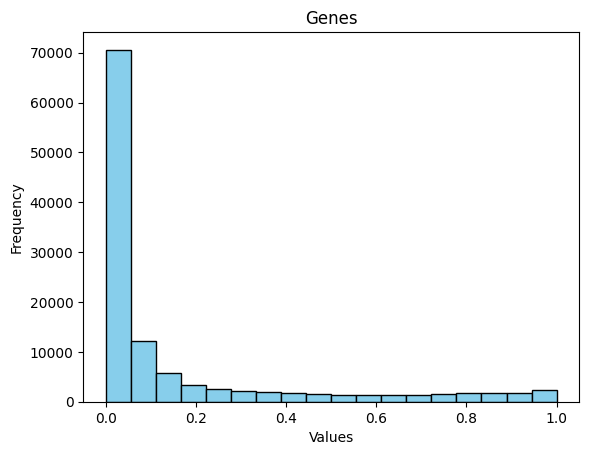

[0.60608948 0.10504223 0.0491519  0.02933148 0.02217244 0.01891052
 0.01682461 0.01446402 0.01248112 0.01128794 0.01103042 0.01176006
 0.0122751  0.01341677 0.01503914 0.01567436 0.01513357 0.01991485]
[0.         0.05555556 0.11111111 0.16666667 0.22222222 0.27777778
 0.33333333 0.38888889 0.44444444 0.5        0.55555556 0.61111111
 0.66666667 0.72222222 0.77777778 0.83333333 0.88888889 0.94444444
 1.        ]
<BarContainer object of 18 artists>


In [ ]:
(p, bins, patches ) = plt.hist(genes, bins=18, color='skyblue', edgecolor='black')
p=p/116496


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Genes')


plt.show()
print(p)
print(bins)
print(patches)

In [ ]:
hist, bin_edges = np.histogram(genes, bins=18)
hist = hist / 116496
values_in_bins = {}

for i in range(len(bin_edges) - 1):
    values_in_current_bin = [val for val in genes if bin_edges[i] <= val < bin_edges[i + 1]]

    values_in_bins[f'Bin {i+1}'] = values_in_current_bin
print(hist)

[0.60608948 0.10504223 0.0491519  0.02933148 0.02217244 0.01891052
 0.01682461 0.01446402 0.01248112 0.01128794 0.01103042 0.01176006
 0.0122751  0.01341677 0.01503914 0.01567436 0.01513357 0.01991485]


In [ ]:
def count_joint_probability_in_bin(gene_name, values_in_bin):
  all_samples = 60
  prob = 0
  count_in_bin_and_status_true = 0
  eps = 0.0000001
  for val1, val2 in zip(normalized_mouse_df[gene_name],
                        normalized_mouse_df['Disease status']):
    if (val1 in values_in_bin and val2 == 1):
      count_in_bin_and_status_true = count_in_bin_and_status_true + 1
  joint_prob = count_in_bin_and_status_true / all_samples

  if (joint_prob == 0.0):
    return eps
  else:
    return joint_prob


In [ ]:
def mutual_information(joint_prob_per_bin, probabilities_per_bin):
  sum = 0
  all_samples = 60
  disease_status_true_count = (normalized_mouse_df['Disease status'] == 1).sum()
  p_y = disease_status_true_count / all_samples
  for key, prob in zip(joint_prob_per_bin.keys(), probabilities_per_bin):

    sum = sum + joint_prob_per_bin[key] * np.log(joint_prob_per_bin[key]/(prob*p_y))

  return sum


In [ ]:
mutual_info_scores = {}
for gene in mouse_genes_intersection:
  joint_prob_per_bin = {}
  for key in values_in_bins.keys():
    joint_prob = count_joint_probability_in_bin(gene, values_in_bins[key])
    joint_prob_per_bin[key] = joint_prob
  mutual_info_scores[gene] = mutual_information(joint_prob_per_bin, hist)

In [ ]:
sorted_dict = dict(sorted(mutual_info_scores.items(), key=lambda x: (-x[1], x[0])))
significant_genes = list(sorted_dict.keys())[:10]
significant_genes

['ENSMUSG00000032977',
 'ENSMUSG00000032777',
 'ENSMUSG00000025103',
 'ENSMUSG00000030811',
 'ENSMUSG00000031314',
 'ENSMUSG00000021796',
 'ENSMUSG00000020814',
 'ENSMUSG00000066129',
 'ENSMUSG00000021102',
 'ENSMUSG00000031446']

In [ ]:
list(sorted_dict.values())[:10]

[0.37350988457615947,
 0.35982744878949224,
 0.3462984835069235,
 0.3456966344457951,
 0.33761960003366226,
 0.3305530605478918,
 0.33037934541062225,
 0.3284539114745998,
 0.3264276074491724,
 0.3224323710661974]

In [ ]:
filtered_df = normalized_mouse_df[significant_genes]
filtered_df

ENSEMBL,ENSMUSG00000032977,ENSMUSG00000032777,ENSMUSG00000025103,ENSMUSG00000030811,ENSMUSG00000031314,ENSMUSG00000021796,ENSMUSG00000020814,ENSMUSG00000066129,ENSMUSG00000021102,ENSMUSG00000031446
0,0.064610,0.077452,0.078691,0.028165,0.069124,0.063616,0.077726,0.138543,0.064912,0.021641
1,0.032102,0.081008,0.070842,0.033809,0.015363,0.071119,0.102590,0.207345,0.065695,0.020448
2,0.039631,0.066257,0.065500,0.038963,0.029549,0.044095,0.026810,0.098493,0.092061,0.035395
3,0.044092,0.090105,0.069118,0.035953,0.044463,0.052104,0.050763,0.129665,0.058527,0.022829
4,0.031374,0.076828,0.071837,0.036213,0.032840,0.048367,0.055537,0.131200,0.069522,0.028020
5,0.049767,0.056854,0.086697,0.032936,0.007567,0.057423,0.065241,0.131572,0.064705,0.031595
6,1.000000,0.492154,1.000000,0.402693,0.914149,1.000000,1.000000,0.922243,0.864696,0.350280
7,0.542857,0.268256,0.388199,0.210680,0.327614,0.511945,0.371166,0.375331,0.227230,0.127585
8,0.132468,0.384430,0.282609,0.249350,0.195512,0.557289,0.377301,0.407503,0.245531,0.134545
9,0.597403,0.268256,0.346273,0.228015,0.295909,0.526572,0.490798,0.453079,0.298907,0.178620


In [ ]:

rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_df

cv_scores = cross_val_score(model, X_mouse, y_mouse, cv=rkf)
predictions = cross_val_predict(model, X_mouse, y_mouse, cv=rkf)

precision = precision_score(y_mouse, predictions, average='macro')
recall = recall_score(y_mouse, predictions, average='macro')
f1 = f1_score(y_mouse, predictions, average='macro')


print("Mean of Cross-Validation Scores for mouse data set:", np.mean(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean of Cross-Validation Scores for mouse data set: 0.30357142857142855
Precision: 0.2709090909090909
Recall: 0.3055555555555556
F1 Score: 0.2782678428227746


In [ ]:
loo = LeaveOneOut()

In [ ]:
accuracy_scores = []
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_df.values
model = LogisticRegression(max_iter=1000)
for train_index, test_index in loo.split(X_mouse):
    X_train, X_test = X_mouse[train_index], X_mouse[test_index]
    y_train, y_test = y_mouse[train_index], y_mouse[test_index]


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


average_accuracy = np.mean(accuracy_scores)
print("Average Jackknife Accuracy:", average_accuracy)

Average Jackknife Accuracy: 0.0


In [ ]:

rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='sigmoid')
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_df

cv_scores = cross_val_score(model, X_mouse, y_mouse, cv=rkf)
predictions = cross_val_predict(model, X_mouse, y_mouse, cv=rkf)

precision = precision_score(y_mouse, predictions, average='macro')
recall = recall_score(y_mouse, predictions, average='macro')
f1 = f1_score(y_mouse, predictions, average='macro')

print("Mean of Cross-Validation Scores for mouse data set with SVM model:", np.mean(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean of Cross-Validation Scores for mouse data set with SVM model: 0.4607142857142857
Precision: 0.47213622291021673
Recall: 0.4722222222222222
F1 Score: 0.47181467181467185


In [ ]:
accuracy_scores = []
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_df.values
model = SVC(kernel='sigmoid')
for train_index, test_index in loo.split(X_mouse):
    X_train, X_test = X_mouse[train_index], X_mouse[test_index]
    y_train, y_test = y_mouse[train_index], y_mouse[test_index]


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


average_accuracy = np.mean(accuracy_scores)
std = np.std(accuracy_scores)
print("Average Jackknife Accuracy for SVM mouse data set:", average_accuracy)
print("Standard deviation is:", std)

Average Jackknife Accuracy for SVM mouse data set: 0.0
Standard deviation is: 0.0


In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_df.values
model = RandomForestClassifier()
for train_index, test_index in loo.split(X_mouse):
    X_train, X_test = X_mouse[train_index], X_mouse[test_index]
    y_train, y_test = y_mouse[train_index], y_mouse[test_index]


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)


average_accuracy = np.mean(accuracy_scores)
std = np.std(accuracy_scores)
print("Average Jackknife Accuracy for Random forest mouse data set:", average_accuracy)
print("Standard deviation is:", std)
print("Precision is ", np.mean(precision_scores))
print("Recall is ", np.mean(recall_scores))
print("F-1 score is ", np.mean(f1_scores))

Average Jackknife Accuracy for Random forest mouse data set: 0.3333333333333333
Standard deviation is: 0.47140452079103173
Precision is  0.19444444444444445
Recall is  0.19444444444444445
F-1 score is  0.19444444444444445


In [ ]:

rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier()
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_df

cv_scores = cross_val_score(model, X_mouse, y_mouse, cv=rkf)
predictions = cross_val_predict(model, X_mouse, y_mouse, cv=rkf)

precision = precision_score(y_mouse, predictions, average='macro')
recall = recall_score(y_mouse, predictions, average='macro')
f1 = f1_score(y_mouse, predictions, average='macro')


print("Mean of Cross-Validation Scores for mouse data set with Random forest model:", np.mean(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean of Cross-Validation Scores for mouse data set with Random forest model: 0.41428571428571426
Precision: 0.3246753246753247
Recall: 0.3333333333333333
F1 Score: 0.32499999999999996


In [ ]:
critical_val = 1.36/np.sqrt(36)
critical_val

0.22666666666666668

In [ ]:
ks_scores = {}
for gene in mouse_genes_intersection:
  healthy = []
  disease = []
  for value, status in zip(normalized_mouse_df[gene], normalized_mouse_df['Disease status']):
    if (status == 0):
      healthy.append(value)
    else:
      disease.append(value)
  ks_scores[gene] = kstest(healthy, disease).statistic

In [ ]:

keys_with_values_greater = [key for key, value in ks_scores.items() if value > critical_val]

print(keys_with_values_greater)

['ENSMUSG00000025037', 'ENSMUSG00000021196', 'ENSMUSG00000027010', 'ENSMUSG00000020844', 'ENSMUSG00000041765', 'ENSMUSG00000063235', 'ENSMUSG00000027163', 'ENSMUSG00000032329', 'ENSMUSG00000043079', 'ENSMUSG00000034501', 'ENSMUSG00000023021', 'ENSMUSG00000052331', 'ENSMUSG00000025743', 'ENSMUSG00000045318', 'ENSMUSG00000026880', 'ENSMUSG00000024251', 'ENSMUSG00000021178', 'ENSMUSG00000040721', 'ENSMUSG00000034110', 'ENSMUSG00000016940', 'ENSMUSG00000025173', 'ENSMUSG00000071359', 'ENSMUSG00000036513', 'ENSMUSG00000024970', 'ENSMUSG00000003039', 'ENSMUSG00000031988', 'ENSMUSG00000035864', 'ENSMUSG00000097391', 'ENSMUSG00000026739', 'ENSMUSG00000022428', 'ENSMUSG00000040037', 'ENSMUSG00000032301', 'ENSMUSG00000066705', 'ENSMUSG00000041632', 'ENSMUSG00000031954', 'ENSMUSG00000029463', 'ENSMUSG00000096929', 'ENSMUSG00000029048', 'ENSMUSG00000040433', 'ENSMUSG00000027710', 'ENSMUSG00000021248', 'ENSMUSG00000093661', 'ENSMUSG00000051527', 'ENSMUSG00000032216', 'ENSMUSG00000038587', 'ENSMUSG0

In [ ]:
len(keys_with_values_greater)

100

In [ ]:
filtered_ks = normalized_mouse_df[keys_with_values_greater]
filtered_ks

ENSEMBL,ENSMUSG00000025037,ENSMUSG00000021196,ENSMUSG00000027010,ENSMUSG00000020844,ENSMUSG00000041765,ENSMUSG00000063235,ENSMUSG00000027163,ENSMUSG00000032329,ENSMUSG00000043079,ENSMUSG00000034501,...,ENSMUSG00000072437,ENSMUSG00000028229,ENSMUSG00000058135,ENSMUSG00000020814,ENSMUSG00000033863,ENSMUSG00000003199,ENSMUSG00000028252,ENSMUSG00000034893,ENSMUSG00000029560,ENSMUSG00000042109
0,0.008994,0.013954,0.021890,0.004134,0.040867,0.020329,0.020706,0.014350,0.029325,0.006744,...,0.043170,0.037730,0.115344,0.077726,0.000801,0.013770,0.050831,0.059683,0.080932,0.121448
1,0.006574,0.016225,0.023572,0.010129,0.040260,0.012113,0.025403,0.020797,0.056605,0.006372,...,0.052272,0.033263,0.196036,0.102590,0.003095,0.012136,0.020569,0.059083,0.080824,0.180708
2,0.007002,0.020683,0.023570,0.006410,0.046204,0.016634,0.019211,0.024499,0.068083,0.004043,...,0.058055,0.043485,0.142051,0.026810,0.003666,0.001163,0.039562,0.037763,0.083689,0.127454
3,0.006619,0.021319,0.056795,0.003974,0.050649,0.039028,0.032473,0.072455,0.120032,0.008146,...,0.042192,0.028974,0.134562,0.050763,0.002882,0.017919,0.009059,0.054665,0.073843,0.139800
4,0.009112,0.024741,0.030891,0.004107,0.042075,0.037738,0.022739,0.034735,0.101680,0.005704,...,0.037383,0.054255,0.108827,0.055537,0.000373,0.000741,0.008409,0.020711,0.066778,0.125349
5,0.006963,0.012399,0.031383,0.003833,0.058805,0.048933,0.023286,0.025672,0.047357,0.005040,...,0.036370,0.044997,0.127625,0.065241,0.003883,0.019111,0.025809,0.039393,0.078340,0.127069
6,0.026688,0.072667,0.259407,0.009288,0.140071,0.189495,1.000000,0.037623,0.385804,0.053497,...,0.562632,0.082510,0.022947,1.000000,0.008515,0.235735,0.155643,0.266900,0.665779,0.024248
7,0.011224,0.026991,0.051278,0.004222,0.048862,0.021055,0.360231,0.012541,0.153392,0.022411,...,0.182949,0.023272,0.008032,0.371166,0.003193,0.094294,0.035373,0.095810,0.306161,0.008083
8,0.006485,0.029067,0.060327,0.004222,0.035832,0.035092,0.270893,0.015676,0.181282,0.016627,...,0.334572,0.006347,0.009179,0.377301,0.001064,0.090365,0.042448,0.054749,0.259994,0.010328
9,0.010226,0.053981,0.087474,0.003377,0.052119,0.070183,0.432277,0.037623,0.190578,0.020965,...,0.230566,0.027503,0.011474,0.490798,0.000000,0.110010,0.091971,0.123184,0.342609,0.011226


In [ ]:

rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000)
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_ks

cv_scores = cross_val_score(model, X_mouse, y_mouse, cv=rkf)
predictions = cross_val_predict(model, X_mouse, y_mouse, cv=rkf)

precision = precision_score(y_mouse, predictions, average='macro')
recall = recall_score(y_mouse, predictions, average='macro')
f1 = f1_score(y_mouse, predictions, average='macro')

print("Mean of Cross-Validation Scores for mouse data set:", np.mean(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean of Cross-Validation Scores for mouse data set: 0.41785714285714287
Precision: 0.41640866873065013
Recall: 0.41666666666666663
F1 Score: 0.4162162162162162


In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_ks.values
model = LogisticRegression(max_iter=1000)
for train_index, test_index in loo.split(X_mouse):
    X_train, X_test = X_mouse[train_index], X_mouse[test_index]
    y_train, y_test = y_mouse[train_index], y_mouse[test_index]


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)


average_accuracy = np.mean(accuracy_scores)
print("Average Jackknife Accuracy:", average_accuracy)
print("Precision is ", np.mean(precision_scores))
print("Recall is ", np.mean(recall_scores))
print("F-1 score is ", np.mean(f1_scores))

Average Jackknife Accuracy: 0.2222222222222222
Precision is  0.1111111111111111
Recall is  0.1111111111111111
F-1 score is  0.1111111111111111


In [ ]:

rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='sigmoid')
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_ks

cv_scores = cross_val_score(model, X_mouse, y_mouse, cv=rkf)
predictions = cross_val_predict(model, X_mouse, y_mouse, cv=rkf)

precision = precision_score(y_mouse, predictions, average='macro')
recall = recall_score(y_mouse, predictions, average='macro')
f1 = f1_score(y_mouse, predictions, average='macro')


print("Mean of Cross-Validation Scores for mouse data set with Random forest model:", np.mean(cv_scores))
print("Standard deviation is: ", np.std(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean of Cross-Validation Scores for mouse data set with Random forest model: 0.40714285714285714
Standard deviation is:  0.20152479970951265
Precision: 0.41428571428571426
Recall: 0.41666666666666663
F1 Score: 0.41258741258741255


In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_ks.values
model = SVC(kernel='sigmoid')
for train_index, test_index in loo.split(X_mouse):
    X_train, X_test = X_mouse[train_index], X_mouse[test_index]
    y_train, y_test = y_mouse[train_index], y_mouse[test_index]


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)


average_accuracy = np.mean(accuracy_scores)
print("Average Jackknife Accuracy for SVM mouse data set:", average_accuracy)
print("Precision is ", np.mean(precision_scores))
print("Recall is ", np.mean(recall_scores))
print("F-1 score is ", np.mean(f1_scores))

Average Jackknife Accuracy for SVM mouse data set: 0.0
Precision is  0.0
Recall is  0.0
F-1 score is  0.0


In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_ks.values
model = RandomForestClassifier(random_state=42)
for train_index, test_index in loo.split(X_mouse):
    X_train, X_test = X_mouse[train_index], X_mouse[test_index]
    y_train, y_test = y_mouse[train_index], y_mouse[test_index]

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

average_accuracy = np.mean(accuracy_scores)
std = np.std(accuracy_scores)

print("Average Jackknife Accuracy for Random forest mouse data set:", average_accuracy)
print("Standard deviation is ", std)
print("Precision is ", np.mean(precision_scores))
print("Recall is ", np.mean(recall_scores))
print("F-1 score is ", np.mean(f1_scores))

Average Jackknife Accuracy for Random forest mouse data set: 0.8055555555555556
Standard deviation is  0.39577241246597245
Precision is  0.3888888888888889
Recall is  0.3888888888888889
F-1 score is  0.3888888888888889


In [ ]:
rkf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=100)
y_mouse = normalized_mouse_df['Disease status']
X_mouse = filtered_ks

cv_scores = cross_val_score(model, X_mouse, y_mouse, cv=rkf)
predictions = cross_val_predict(model, X_mouse, y_mouse, cv=rkf)

precision = precision_score(y_mouse, predictions, average='macro')
recall = recall_score(y_mouse, predictions, average='macro')
f1 = f1_score(y_mouse, predictions, average='macro')

print("Mean of Cross-Validation Scores for mouse data set with Random forest model:", np.mean(cv_scores))
print("Standard deviation is: ", np.std(cv_scores))
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean of Cross-Validation Scores for mouse data set with Random forest model: 0.7285714285714285
Standard deviation is:  0.18294640678379567
Precision: 0.725
Recall: 0.7222222222222222
F1 Score: 0.7213622291021671
